In [1]:
# ====================================
# 1. Cargar librerías
# ====================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [3]:
# ====================================
# 2. Cargar datos
# ====================================
data = pd.read_csv("/Users/gabrielreyes/Downloads/breast-cancer.csv")
print("Primeras filas del dataset:")
display(data.head())

Primeras filas del dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# ====================================
# 3. Preprocesamiento
# ====================================
# Mapear diagnosis a valores numéricos (M=1, B=0)
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

# Eliminar 'id' porque no aporta información
data = data.drop("id", axis=1)

# Variables predictoras y objetivo
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

In [5]:
# ====================================
# 4. División en entrenamiento y prueba
# ====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# ====================================
# 5. Elección y justificación del modelo
# RandomForestClassifier:
# - Maneja datos no lineales
# - No necesita escalar variables
# - Alta precisión y robustez
# ====================================
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



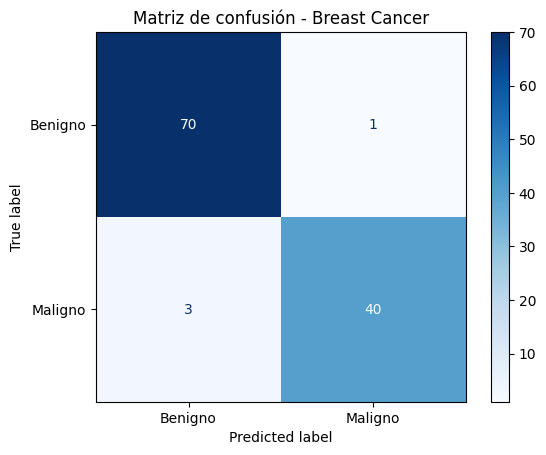

In [7]:
# ====================================
# 6. Predicciones y evaluación
# ====================================
y_pred = model.predict(X_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benigno", "Maligno"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión - Breast Cancer")
plt.show()

In [8]:
# ====================================
# 7. Optimización del modelo
# ====================================
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluar el modelo optimizado
y_pred_best = best_model.predict(X_test)
print("Reporte con el mejor modelo:")
print(classification_report(y_test, y_pred_best))

Mejores parámetros encontrados: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Reporte con el mejor modelo:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

